# Support Vector Machine (SVM)

- 딥러닝 이전에 분류에서 뛰어난 성능으로 많이 사용되었던 분류 모델
- 하나의 분류 그룹을 다른 그룹과 분리하는 최적의 경계를 찾아내는 알고리즘
- 중간 크기의 데이터셋과 특성이(Feature) 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다.

## 선형(Linear) SVM 

**선 (1)과 (2)중 어떤 선이 최적의 분류 선일까?**
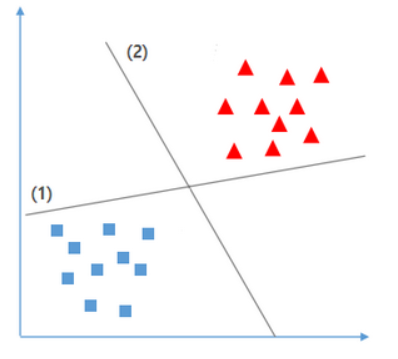

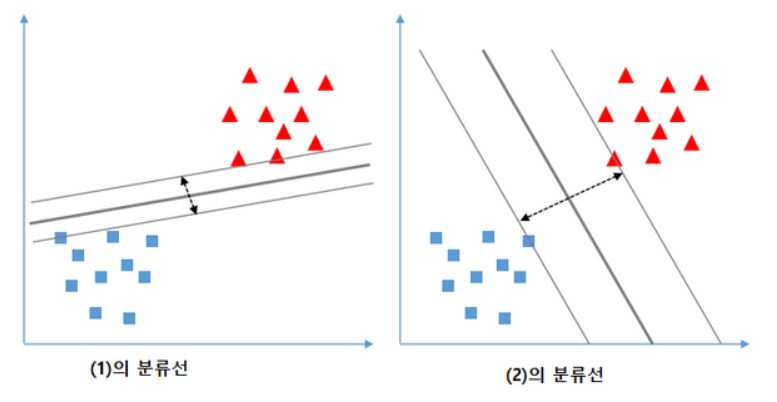

(2) 가 최적의 분류를 위한 경계선이다. 이유는 각 클래스의 별로 가장 가까이 있는 데이터간의 거리가 가장 넓기 때문이다. 넓다는 것은 그만큼 겹치는 부분이 적다는 것이므로 새로운 데이터를 예측할 때 모호성이 적어져서 맞을 확률이 더 높아지게 된다. **SVM 모델은 두 클래스 간의 거리를 가장 넓게 분리할 수있는 경계선을 찾는 것을 목표로 한다.**

## SVM 목표: support vector간의 가장 넓은 margin을 가지는결정경계를 찾는다.

- **Support Vector**: 경계를 찾는데 기준이 되는 데이터포인트. 결정경계에 가장 가까이 있는 vector(데이터포인트)를 말한다.
- **margin**: 두 support vector간의 너비
- margin이 넓은 결정경계를 만드는 함수를 찾는 것.

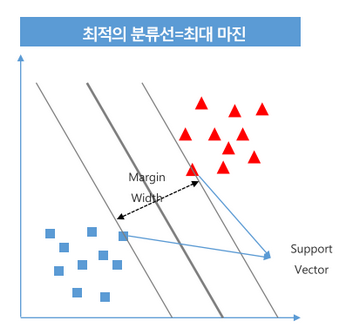

## 규제 - Hard Margin, Soft Margin

- SVM은 데이터 포인트들을 잘 분리하면서 Margin 의 크기를 최대화하는 것이 목적이다. 
    - Margin의 최대화에 가장 문제가 되는 것이 Outlier(이상치) 들이다. 
    - Train set의 Outlier들은 Overfitting에 주 원인이 된다.
- Margine을 나눌 때 Outlier을 얼마나 무시할 것인지에 따라 Hard margin과 soft margin으로 나뉜다.
- **Hard Margin**
    - Outlier들을 무시하지 않고 Support Vector를 찾는다. 그래서 Support Vector와 결정 경계 사이의 거리 즉 Margin이 매우 좁아 질 수 있다. 학습시 이렇게 개별 데이터포인트들을 다 놓치지 않으려는 기준으로 결정 경계를 정해버리면 overfitting 문제가 발생할 수 있다.
- **Soft Margin**    
    - 일부 Outlier들을 무시하고 Support Vector를 찾는다. 즉 Outlier들이 Margin 안에 어느정도 포함되도록 기준을 잡는다. 그래서 Support Vector와 결정 경계 사이 즉 Margin의 거리가 넓어진다. 얼마나 많은 Outlier들을 무시할 지는 하이퍼파라미터로 설정한다. 무시비율이 너무 커지면 잘 분리되야 하는 것들 까지 이상치로 판단해서 무시 하기 때문에 underfitting 문제가 발생할 수 있다.

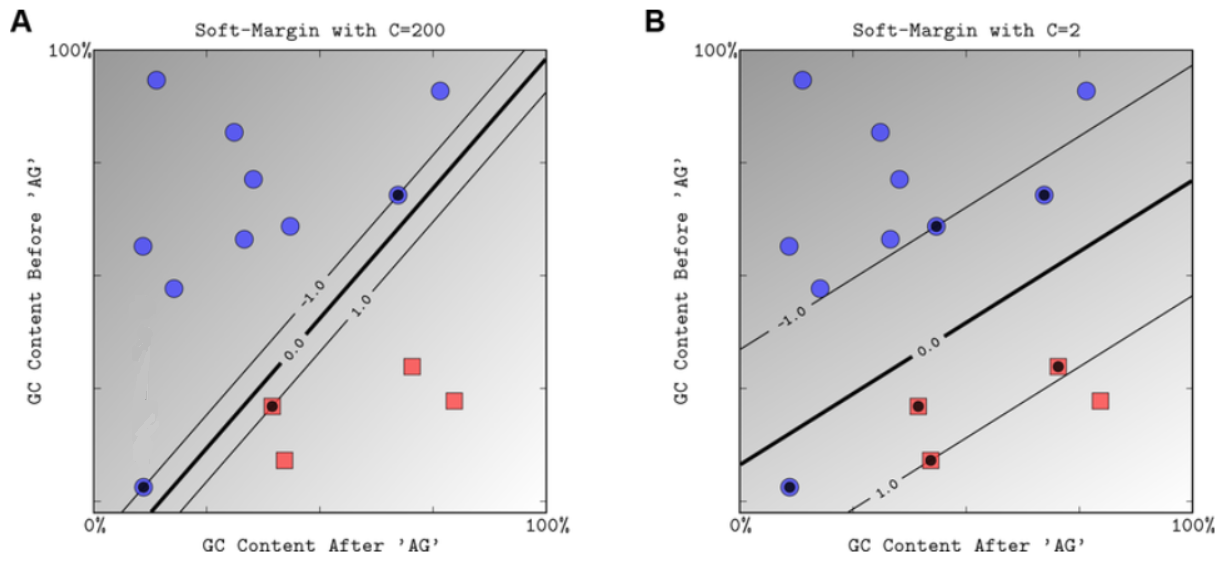

### 하이퍼파라미터 C
- Outlier 를 무시하는 비율을 설정하는 하이퍼파라미터
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **하이퍼파라미터인 C값을** 조정해 마진을 변경한다.
- 기본값 1
- 파라미터값을 크게주면 제약조건을 강하게 한다.
    - 마진폭이 좁아져 마진 오류가 작아지나 Overfitting이 일어날 가능성이 크다.
- 파라미터값을 작게 주면 제약조건을 약하게 한다.
    - 마진폭이 넓어져 마진 오류가 커진다. 
    - 훈련데이터에서는 성능이 안좋아지나 일반화(generalization)되어 테스트 데이터의 성능이 올라간다. 그러나 underfitting 이 날 가능성이 있다.

### Linear SVM에서 C의 변화에 따른 성능변화 확인

- overfitting: C의 값을 줄인다.
- underfitting: C의 값을 늘린다.

##### import

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data 관련
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# feature scaling 관련
from sklearn.preprocessing import StandardScaler

# model 관련
from sklearn.svm import SVC

# evaluation index 관련
from sklearn.metrics import accuracy_score

# Grid Search 관련
from sklearn.model_selection import GridSearchCV

##### 데이터 로딩, train/test set 나누기

In [83]:
X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    random_state = 0)

##### Feature scaling

In [84]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델생성 및 학습
- 규제 파라미터인 **C** 값을 변경하면서 성능 확인

In [85]:
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# 각 data set에 대한 accuracy를 담을 list 생성
train_acc_list = []
test_acc_list = []

for C in C_list:
    # model 생성
    svc = SVC(kernel = 'linear', C = C, random_state = 0)
    svc.fit(X_train_scaled, y_train)
    
    # model의 예측 결과 생성
    pred_train = svc.predict(X_train_scaled)
    pred_test = svc.predict(X_test_scaled)
    
    # 각 data set에 대한 accuracy를 계산해 list에 append
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

##### 결과 확인

In [86]:
result = pd.DataFrame({
    'train': train_acc_list,
    'test': test_acc_list
}, index = C_list)

result.rename_axis('C', axis = 0, inplace = True)

result

,train,test
C,,
0.0001,0.643192,0.643357
0.0010,0.936620,0.944056
0.0100,0.978873,0.965035
0.1000,0.990610,0.958042
1.0000,0.990610,0.965035
10.0000,0.992958,0.958042
100.0000,1.000000,0.916084


In [87]:
# C의 값이 커질수록 train data set에 대한 성능은 계속 좋아진다. 하지만 test data set에 대한 성능은 C = 1일 때 최고 성능을 보이고
# 그 뒤로는 성능이 떨어진다.
# 즉 C = 1일 때 model의 성능이 가장 좋다고 할 수 있다.
# 위 DataFrame을 plotting해보자.

In [88]:
# 위 DataFrame을 plotting하면 C 값이 x 축에 위치하게 된다.
# 이는 그래프를 보기에 좋지 않을 것이다. 왜냐하면 C 값이 10의 n제곱이므로 0.0001부터 1까지의 변화가 잘 보이지 않기 때문이다.
# 그래서 아래와 같이 C_list에 log10을 취한다.

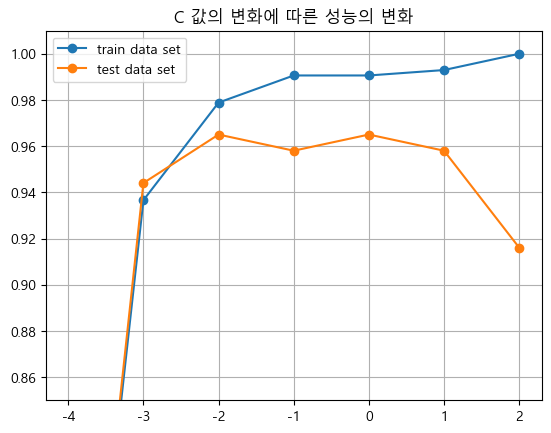

In [89]:
C = np.log10(np.array(C_list))


plt.plot(C, result['train'], label = 'train data set', marker = 'o')
plt.plot(C, result['test'], label = 'test data set', marker = 'o')

plt.title('C 값의 변화에 따른 성능의 변화')
plt.legend()
plt.ylim(0.85, 1.01)
plt.grid(True)

plt.show()

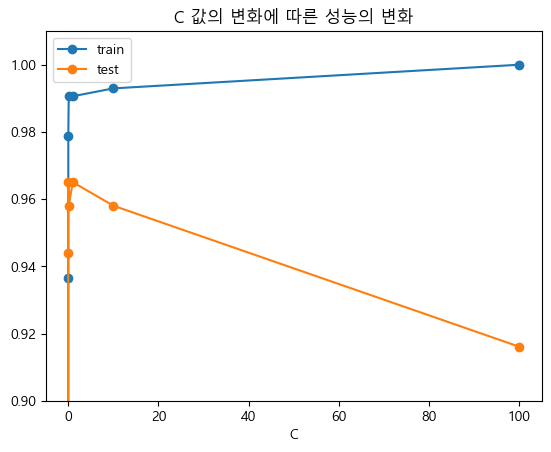

In [90]:
result.plot(ylim = (0.90, 1.01), marker = 'o')
plt.title('C 값의 변화에 따른 성능의 변화')
plt.show()

## Kernel SVM (비선형(Non Linear) SVM)
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우는?
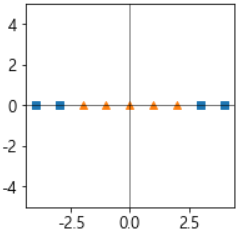

- 다항식 특성을 추가하여 차원을 늘려 선형 분리가 되도록 변환   
<center>[2차원으로 변환 $x_3=x_1^2$ 항 추가]</center>

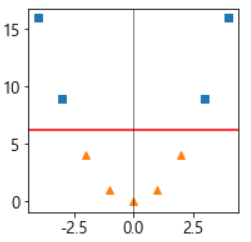

<center>[원래 공간으로 변환]</center>

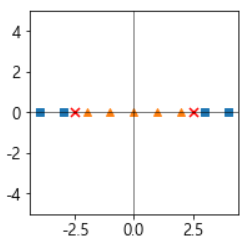

https://www.youtube.com/watch?v=3liCbRZPrZA&t=42s

### Kernel trick(커널 트릭)
- 비선형 데이터셋을 선형으로 분리하기 위해 차원을 변경해야 하는데 이때 사용하는 함수를 **Kernel**이라고 하고 차원을 변경하는 것을 **kernel trick** 이라고 한다.
    - 대표적인 kernel함수 
        - **Radial kernel**
        - Polynomial kernel
        - Sigmoid kernel

- <b style='font-size:1.2em'>Non linear SVM 모델의 하이퍼파라미터</b>
    - C
        - 오차 허용기준관련 규제. 
            - 기본 값은 1이며 클수록 규제를 강하게 하고 작을 수록 규제를 약하게 한다.
        - 모델이 과대적합(overfitting)일 경우 값을 감소시키고, 과소적합(underfitting)일 경우 값을 증가 시킨다.
    - gamma 
        - Kernel함수 규제 값.
            - 기본 값은 1이며 클수록 규제를 강하게 하고 작을 수록 규제를 약하게 한다.
        - 모델이 과대적합(overfitting)일 경우 값을 감소시키고, 과소적합(underfitting)일 경우 값을 증가 시킨다.
        

In [91]:
# C 값은 고정하고 gamma를 변경하면서 성능의 변화를 확인해보자.
# C & gamma를 큰 값으로 설정했을 때 복잡한 model이 만들어진다.
# 작은 값으로 설정하면 단순한 model이 만들어진다.

In [92]:
gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# 각 data set에 대한 accuracy를 담을 list 생성
acc_train_list = []
acc_test_list = []

for gamma in gamma_list:
    # model 생성
    svc = SVC(kernel = 'rbf', C = 1, gamma = gamma, random_state = 0)
    svc.fit(X_train_scaled, y_train)
    
    # model의 예측 결과 생성
    pred_train = svc.predict(X_train_scaled)
    pred_test = svc.predict(X_test_scaled)
    
    # 각 data set에 대한 accuracy를 계산해 list에 append
    acc_train_list.append(accuracy_score(y_train, pred_train))
    acc_test_list.append(accuracy_score(y_test, pred_test))

In [93]:
result = pd.DataFrame({
    'train': acc_train_list,
    'test': acc_test_list}, 
    index = gamma_list)

result.rename_axis('gamma', axis = 0, inplace = True)

result

,train,test
gamma,,
0.0001,0.791080,0.797203
0.0010,0.950704,0.958042
0.0100,0.985915,0.958042
0.1000,0.995305,0.923077
1.0000,1.000000,0.636364
10.0000,1.000000,0.629371
100.0000,1.000000,0.629371


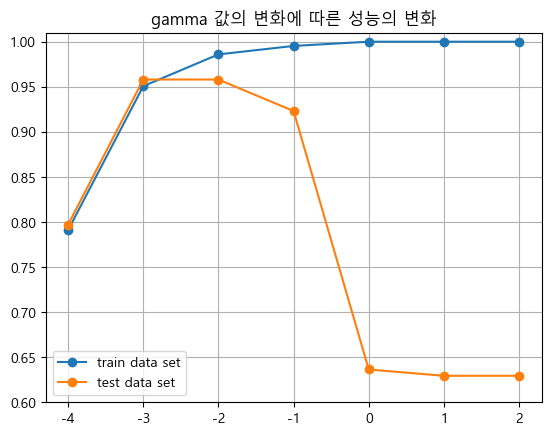

In [94]:
gamma = np.log10(np.array(gamma_list))


plt.plot(gamma, result['train'], label = 'train data set', marker = 'o')
plt.plot(gamma, result['test'], label = 'test data set', marker = 'o')

plt.title('gamma 값의 변화에 따른 성능의 변화')
plt.legend()
plt.ylim(0.6, 1.01)
plt.grid(True)

plt.show()

##### ROC AUC score, AP score 

In [95]:
# AP score와 ROC AUC score를 계산하려면 model이 positive라고 예측한 확률이 필요하다.
# 하지만 SVC는 predict_proba() method 사용이 기본적으로 불가능하다.
# 그래서 SVC model을 생성할 때 parameter로 probability = True를 입력해야 한다.
# 해당 parameter를 입력하면 SVC model에서도 predict_proba() method를 사용할 수 있다.

In [96]:
# model을 생성한다.
svc = SVC(C = 1, gamma = 0.01, random_state = 0, probability = True)
svc.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01, probability=True, random_state=0)

In [97]:
# test data set에 대해 model이 positive라고 예측할 확률을 추출한다.
proba_test = svc.predict_proba(X_test_scaled)[:, 1]

In [98]:
from sklearn.metrics import average_precision_score, roc_auc_score

In [99]:
print('AP score:', round(average_precision_score(y_test, proba_test), 3))
print('ROC AUC score:', round(roc_auc_score(y_test, proba_test), 3))

AP score: 0.996
ROC AUC score: 0.992


## GridSearch로 최적의 조합찾기

##### GridSearchCV 생성 및 학습
- kernel: rbf, linear
- C, gamma: 0.0001, 0.001, 0.01, 0.1, 1, 10

- LinearSVC: C
- RBF SVC: C, gamma

In [100]:
svc = SVC(random_state = 0)

params = {
    'kernel': ['rbf', 'linear'], 
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

gs = GridSearchCV(estimator = svc, 
                  param_grid = params, 
                  scoring = 'accuracy', 
                  cv = 4, 
                  n_jobs = -1)

In [101]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [102]:
gs.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}

In [103]:
gs.best_score_

0.9836007758772702

In [104]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
57,0.003037,0.000489,0.000500,0.000500,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.981308,0.971963,1.0,0.981132,0.983601,0.010195,1
49,0.002500,0.000501,0.001526,0.000910,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.981308,0.971963,1.0,0.981132,0.983601,0.010195,1
51,0.007000,0.007516,0.001250,0.000434,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.981308,0.971963,1.0,0.981132,0.983601,0.010195,1
53,0.002969,0.000053,0.000502,0.000502,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.981308,0.971963,1.0,0.981132,0.983601,0.010195,1
55,0.003025,0.000044,0.001113,0.000875,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.981308,0.971963,1.0,0.981132,0.983601,0.010195,1


In [105]:
best_model = gs.best_estimator_

proba_best_model = best_model.predict(X_test_scaled)

acc_best_model = accuracy_score(y_test, proba_best_model)
print(f'best model의 성능: {round(acc_best_model * 100, 3)} %')

best model의 성능: 96.503 %


In [106]:
# pipeline 사용

In [107]:
from sklearn.pipeline import Pipeline

In [120]:
X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [121]:
steps = [
    ('scaler', StandardScaler()), 
    ('svc', SVC(random_state = 0, probability = True))
]

pipeline = Pipeline(steps, verbose = True)

In [122]:
params = {
    'svc__kernel': ['linear', 'rbf', 'poly'], 
    'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 
    'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

gs = GridSearchCV(estimator = pipeline, 
                  param_grid = params, 
                  scoring = ['accuracy', 'roc_auc'],
                  refit = 'accuracy', 
                  cv = 4, 
                  n_jobs = -1)

In [123]:
gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True, random_state=0))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             refit='accuracy', scoring=['accuracy', 'roc_auc'])

In [124]:
gs.best_params_

{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [125]:
gs.best_score_

0.9812643272791395

In [126]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_accuracy').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
97,0.013386,0.001960,0.004588,0.000601,10,0.01,rbf,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.971963,0.971963,...,0.981264,0.009302,1,0.993657,0.987687,1.0,0.999621,0.995241,0.005035,4
75,0.012138,0.001066,0.002716,0.000599,1,0.001,linear,"{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
72,0.016010,0.005348,0.003326,0.000408,1,0.0001,linear,"{'svc__C': 1, 'svc__gamma': 0.0001, 'svc__kern...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
81,0.011731,0.004328,0.003623,0.000957,1,0.1,linear,"{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23
84,0.011908,0.000227,0.002749,0.000433,1,1,linear,"{'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,23


In [135]:
best_model = gs.best_estimator_

pred_test = best_model.predict(X_test)

acc_test = accuracy_score(y_test, pred_test)
print(f'best model의 성능: {round(acc_test * 100, 3)} %')

best model의 성능: 97.203 %
